<div align="center">
  <h1>Principal component analysis (PCA) </h1>
</div>

### <u> Exercise 02 </u>:
Consider the following dataset composed of 6 data rows and 3 variables.

|             |   X  |  Y   |   Z  | 
| ----------- | ---- | ---- | ---- |
| R1          | 12   | 24   | 6    |
| R2          | 17   | 15.5 | -2   |
| R3          | 12   | 13   | 3    |
| R4          | 6    | 13.5 | -2.5 |
| R5          | 17   | 21   | 7.2  |
| R6          | 4    | 20.3 | -0.9 |


Your task is to extract a reduced set of features using PCA method.<br>
 PCA
provides a matrix of eigenvectors that explains the variance of the original
variables. To reduce data using PCA, we run the next operation: <br>
$$ R= X V $$
Where, $R$ is the reduced data ($R$ has the shape of $r$ data rows, and $m$
data columns), $X$ is the original data matrix (i.e., it has the shape of $r$
data rows, and n columns). $V$ is the eigenvectors matrix (it has the
shape of $n$ data rows, and $m$ data columns). <br>
To calculate the reduction matrix $V$, we follow the next steps :
1. Calculate the mean and standard deviation for each variable $ (X, Y, Z)$.

2. Standardize the data using the $Z-score$ to get the standardized matrix $S$. Next, the $Z-score$ formula.

$$
\text{Z-score} = \frac{x - \mu}{\sigma}
$$
Where, $x$ is a feature vector,  $\mu$  is the mean of
$x$ and $\sigma$ is standard deviation of $x$

3. Calculate the covariance matrix, $C$, ($i.e.$, $C$ has the shape of $(n,n)$. The covariance matrix is given by:
$$
C(x, y) = \text{Cov}(x, y) = \frac{xy}{n-1}
$$

Where $x$ and $y$ are two feature vectors, and $n$ is the number of elements in
the data vectors ($i.e.$, number of variables).

4. Find the eigenvalues $(λ1, λ2 ,λ3)$ and corresponding eigenvectors $(v1
,v2,v3)$ of the covariance matrix by solving the next equation:
$$
det(C- D)=0
$$
Where, $D$ is a diagonal matrix having in its diagonal $(λ1, λ2 ,λ3...)$ values.

Also, to get the eigenvectors corresponding to the given eigenvalue
$λ_i$, we solve the next linear equation:
$$
(C−λ_iI) v_i=0
$$
Where, $I$ is the identity matrix of shape $(n,n)$, and $v_i$ is the eigenvector
of shape $(1,n)$ corresponding to the eigenvalue $λ_i$.

5. Sort the eigenvalues in descending order and arrange the
corresponding eigenvectors accordingly.
6. Decide how many principal components to keep based on the
explained variance ($i.e.$, each eigenvalue explains a portion of
variance.). You can decide to keep, for example, the first two principal
components if their sum represents $90\%$ of the variance (sum of their
eigenvalues divided on the total sum is bigger than $0.9$ ).

7. Form the projection matrix $V$ by only keeping eigenvectors
corresponding to the highest eigenvalues.
8. Calculate the reduced data matrix $R$ by projecting the standardized data $X$ into the selected principal components to obtain the reduced-
dimensional representation using.

### Solution :

Calculate the mean and standard deviation for each variable $ (X, Y, Z)$.

In [240]:
import pandas as pd
import numpy as np

# Structure the table into a df for easier manipulation
data = {
    "X": [12, 17, 12, 6, 17, 4],
    "Y": [24, 15.5, 13, 13.5, 21, 20.3],
    "Z": [6, -2, 3, -2.5, 7.2, -0.9],
}

df = pd.DataFrame(data, index=["R1", "R2", "R3", "R4", "R5", "R6"])
df

,X,Y,Z
R1,12,24.0,6.0
R2,17,15.5,-2.0
R3,12,13.0,3.0
R4,6,13.5,-2.5
R5,17,21.0,7.2
R6,4,20.3,-0.9


<b> Step 01 :</b>  Calculate the mean and standard deviation for each variable  (X, Y, Z).

In [241]:
def calculate_mean(column_data: list[float]) -> float:
    return round(np.mean(column_data), 2)


def calculate_std(column_data: list[float]) -> float:
    return round(np.std(column_data), 2)


for var in df.columns:
    mean_var = calculate_mean(df[var])
    std_var = calculate_std(df[var])
    print(
        f" The variable {var} \n The mean is : { mean_var} \n The std is : {std_var} \n"
    )

 The variable X 
 The mean is : 11.33 
 The std is : 4.96 

 The variable Y 
 The mean is : 17.88 
 The std is : 4.12 

 The variable Z 
 The mean is : 1.8 
 The std is : 3.84 



<b> Step 02 :</b>  Standardize the data using Z-score.

In [242]:
def calculate_Z_score(column_data: list) -> list[float]:
    Z_score = (column_data - calculate_mean(column_data)) / calculate_std(column_data)
    return Z_score


# save the results in a new df
df_stand = pd.DataFrame()
for var in df.columns:
    df_stand[var] = calculate_Z_score(df[var])

df_stand

,X,Y,Z
R1,0.135081,1.485437,1.093750
R2,1.143145,-0.577670,-0.989583
R3,0.135081,-1.184466,0.312500
R4,-1.074597,-1.063107,-1.119792
R5,1.143145,0.757282,1.406250
R6,-1.477823,0.587379,-0.703125


<b> Step 03 :</b>  Calculate the covariance matrix.

In [243]:
# transform the df into a numpy ndarray
stand_data_nd_array = df_stand.to_numpy()


def calculate_covariance(stand_data: np.ndarray) -> np.ndarray:
    return np.cov(stand_data, rowvar=False)


cov_matrix = calculate_covariance(stand_data_nd_array)
print(f"The covariance matrix : \n {cov_matrix} \n")

The covariance matrix : 
 [[1.19775408 0.1040688  0.58173723]
 [0.1040688  1.19837324 0.73371764]
 [0.58173723 0.73371764 1.19981554]] 



<b> Step 04 :</b>  Find the eigenvalues and corresponding eigenvectors of the covariance matrix

In [244]:
def get_eigen_val_vect(cov_mat: np.ndarray) -> np.ndarray:
    eigenvals, eigenvects = np.linalg.eig(cov_mat)
    return eigenvals, eigenvects


eigenvalues, eigenvectors = get_eigen_val_vect(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.18758254 1.09673205 0.31162826]

Eigenvectors:
 [[-0.46304491 -0.78508176 -0.4113831 ]
 [-0.55893227  0.6188619  -0.55191001]
 [-0.68788381  0.02562383  0.72536838]]


<b> Step 05 :</b> Sort the eigenvalues in descending order and arrange the corresponding eigenvectors accordingly.

In [245]:
def sort_eigens(eigen_vals: np.ndarray, eigens_vects: np.ndarray):
    """Sort eigenvalues and corresponding eigenvectors"""
    sorted_ids = np.argsort(eigen_vals)[::-1]
    sorted_eigenvalues = eigen_vals[sorted_ids]
    sorted_eigenvectors = eigens_vects[:, sorted_ids]
    return sorted_eigenvalues, sorted_eigenvectors


eigenvals, eigenvects = sort_eigens(eigenvalues, eigenvectors)

print("Sorted Eigenvalues:\n", eigenvals)
print("\n Sorted Eigenvectors:\n", eigenvects)

Sorted Eigenvalues:
 [2.18758254 1.09673205 0.31162826]

 Sorted Eigenvectors:
 [[-0.46304491 -0.78508176 -0.4113831 ]
 [-0.55893227  0.6188619  -0.55191001]
 [-0.68788381  0.02562383  0.72536838]]


<b> Step 06 :</b> Decide how many principal components to keep based on the explained variance

We use <b> Explained Variance Ratio </b> as a metric to evaluate the usefulness of your principal components and to choose how many components to use in your model. The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.9

In [246]:
def select_main_comp(
    eigenvalues: np.ndarray, eigenvectors: np.ndarray, threshold: float
) -> np.ndarray:
    total_variance = np.sum(eigenvalues)
    # calculate explained variance ratio (evr)
    evr = eigenvalues / total_variance
    cumulative_explained_variance = np.cumsum(evr)
    num_components_to_keep = np.argmax(cumulative_explained_variance >= threshold) + 1
    chosen_eigvals = eigenvalues[:num_components_to_keep]
    chosen_eigvects = eigenvectors[:, :num_components_to_keep]
    return chosen_eigvects


main_comp = select_main_comp(eigenvals, eigenvects, 0.9)
print(main_comp)

[[-0.46304491 -0.78508176]
 [-0.55893227  0.6188619 ]
 [-0.68788381  0.02562383]]


<b> Step 06 :</b> Obtain the reduced-dimensional representation

In [247]:
def reduce_data(stand_data: np.ndarray, principal_conponents: np.ndarray) -> np.ndarray:
    return np.dot(stand_data, principal_conponents)


reduced_data = reduce_data(stand_data_nd_array, main_comp)
print(reduced_data)

[[-1.64517994  0.84125702]
 [ 0.47426916 -1.28031722]
 [ 0.38452419 -0.8310628 ]
 [ 1.86207781  0.15703668]
 [-1.91993324 -0.3927762 ]
 [ 0.83966164  1.50570106]]


In [248]:
reduced_df = pd.DataFrame(
    reduced_data, columns=["Principal_Component_1", "Principal_Component_2"]
)
reduced_df

,Principal_Component_1,Principal_Component_2
0,-1.645180,0.841257
1,0.474269,-1.280317
2,0.384524,-0.831063
3,1.862078,0.157037
4,-1.919933,-0.392776
5,0.839662,1.505701


### Bonus : Plot the reduced data

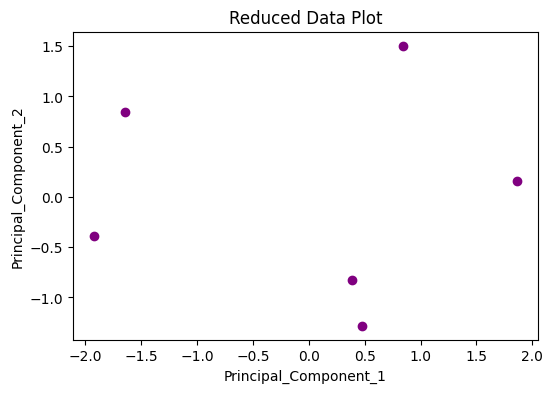

In [249]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(
    reduced_df["Principal_Component_1"],
    reduced_df["Principal_Component_2"],
    color="purple",
)
plt.title("Reduced Data Plot")
plt.xlabel("Principal_Component_1")
plt.ylabel("Principal_Component_2")
plt.show()